In [2]:
import pandas as pd
import kagglehub
import os

path = kagglehub.dataset_download("spscientist/students-performance-in-exams")
dataset = pd.read_csv(os.path.join(path, "StudentsPerformance.csv"))

In [3]:
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
dataset.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# to find dependent variables
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipython-input-8-2223209450.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='gender', palette='Set2')


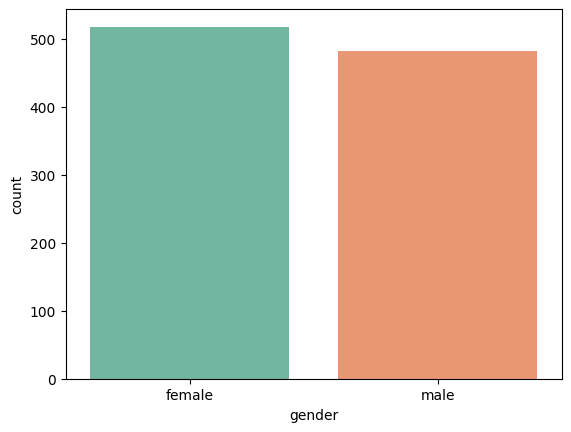

In [8]:
# univerient
# gender plotting by count plot
sns.countplot(data=dataset, x='gender', palette='Set2')
plt.show()

/tmp/ipython-input-9-2909375650.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='race/ethnicity', palette='dark')


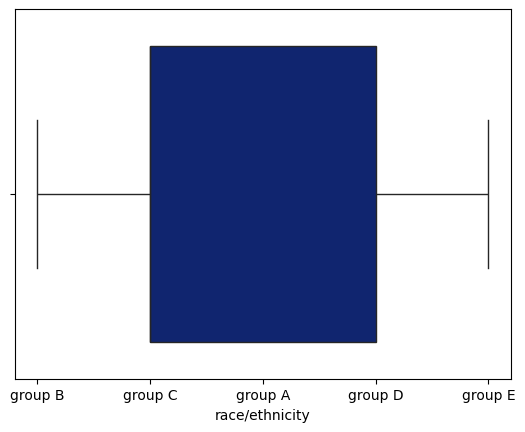

In [9]:
# univerient
# race/ethnicity plotting by boxplot
sns.boxplot(data=dataset, x='race/ethnicity', palette='dark')
plt.show()

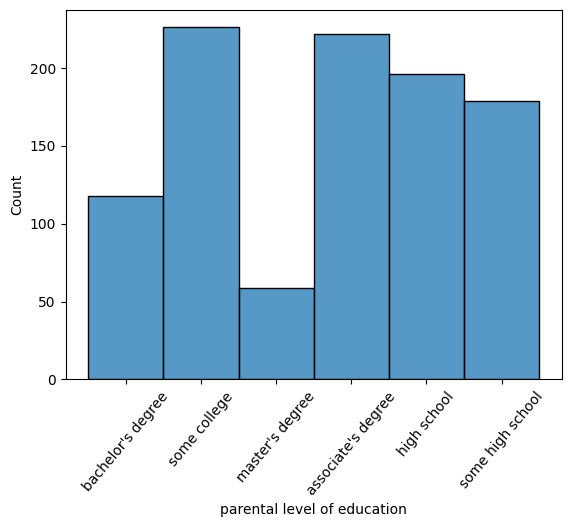

In [10]:
# univerient
# parental level of education plotting by histplot
sns.histplot(dataset['parental level of education'])
plt.xticks(rotation=50)
plt.show()

<Axes: xlabel='test preparation course'>

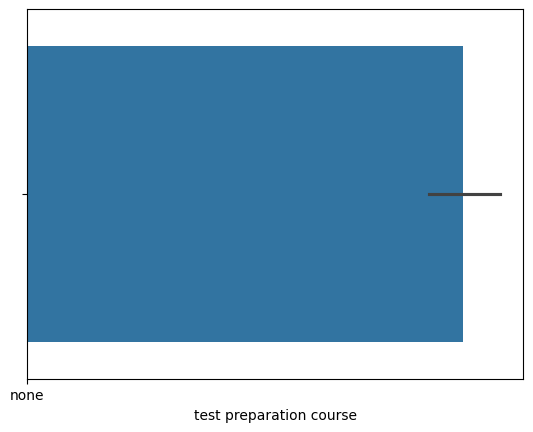

In [11]:
# univerient
# test preparation course plotting by barplot
sns.barplot(data=dataset,x='test preparation course')

<Axes: xlabel='gender', ylabel='math score'>

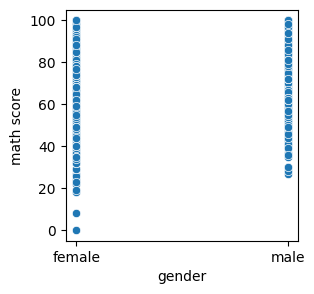

In [12]:
# Bivariate
# 1- scatterplot -- Categorical vs Numerical
plt.figure(figsize=(3, 3))
sns.scatterplot(x='gender', y='math score', data=dataset)

<Axes: xlabel='race/ethnicity', ylabel='reading score'>

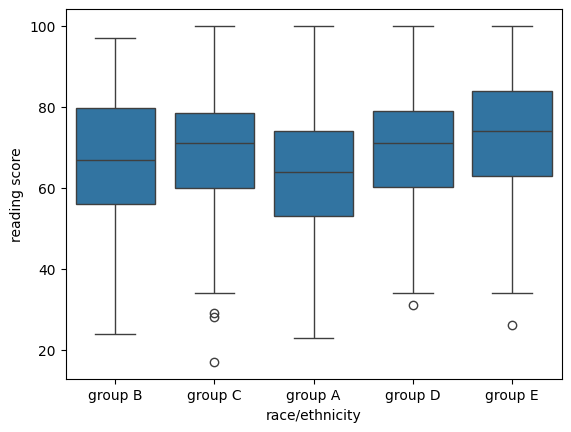

In [13]:
# Bivariate
# 2- boxplot -- Categorical vs Numerical
sns.boxplot(x='race/ethnicity', y='reading score', data=dataset)

<Axes: xlabel='lunch', ylabel='writing score'>

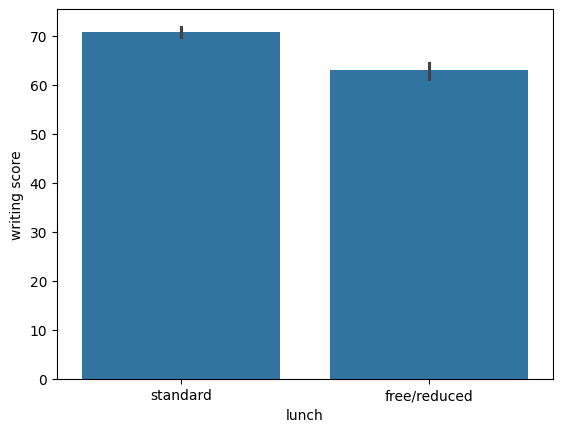

In [14]:
# Bivariate
# 3- barplot -- Categorical vs Numerical
sns.barplot(x='lunch', y='writing score', data=dataset)

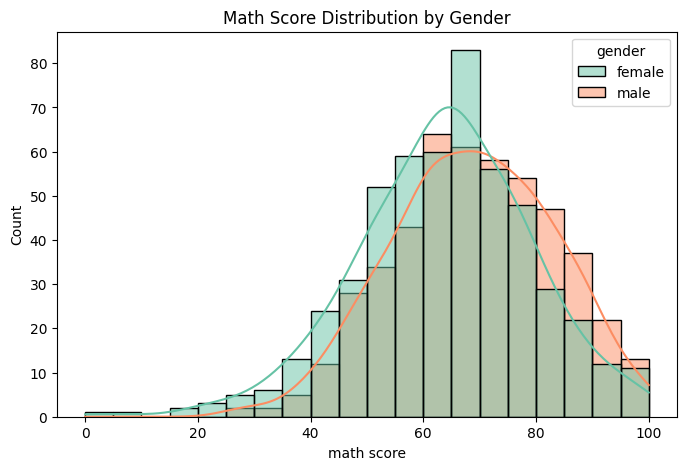

In [15]:
# Bivariate
# 1- histplot -- Categorical vs Categorical
plt.figure(figsize=(8, 5))
sns.histplot(data=dataset, x='math score', hue='gender', bins=20, kde=True, palette='Set2')
plt.title('Math Score Distribution by Gender')
plt.show()

<Axes: xlabel='lunch', ylabel='gender'>

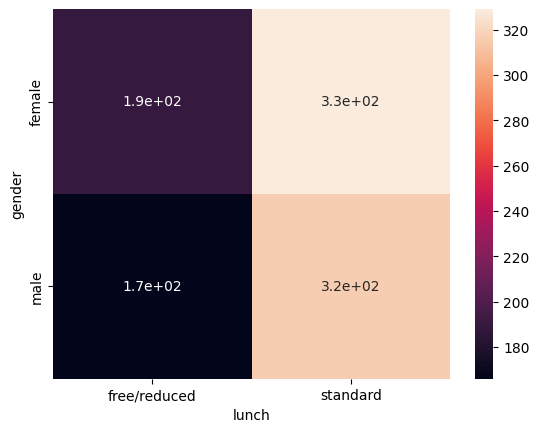

In [16]:
# Bivariate
# 2- heatmap -- Categorical vs Categorical
sns.heatmap(pd.crosstab(dataset['gender'], dataset['lunch']), annot=True)

<Axes: xlabel='math score', ylabel='gender'>

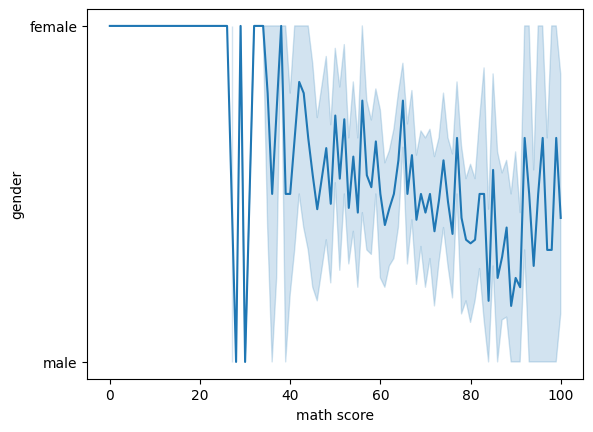

In [47]:
# Bivariate
# 1- lineplot -- Numerical vs Numerical
sns.lineplot(x='math score', y='writing score', data=dataset)

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
le=LabelEncoder()
data=le.fit_transform(dataset['gender'])

<Axes: xlabel='gender', ylabel='math score'>

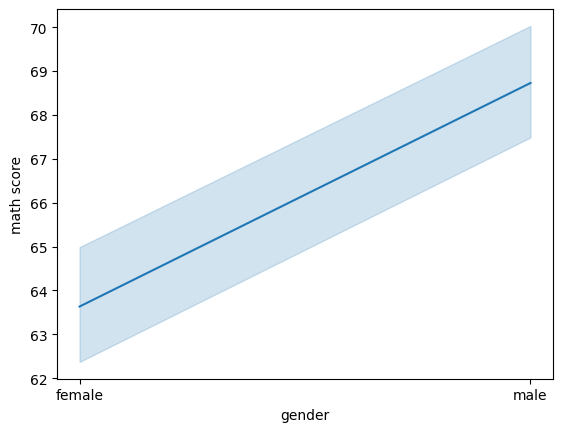

In [67]:
# Bivariate
# 2- lineplot -- Categorical vs Numerical
sns.lineplot(x='gender', y='math score', data=dataset)

<Axes: xlabel='math score', ylabel='reading score'>

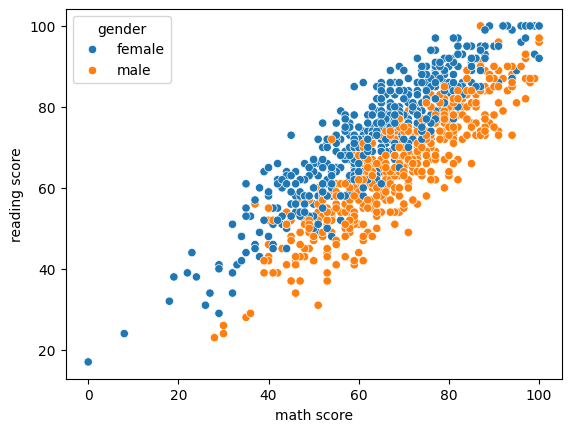

In [68]:
# Trivariate Plots
# 1 - Hue in scatterplot
sns.scatterplot(x='math score', y='reading score', hue='gender', data=dataset)

<Axes: xlabel='math score', ylabel='race/ethnicity'>

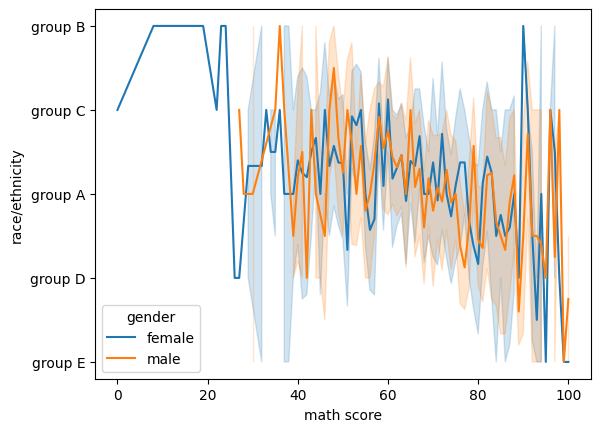

In [69]:
# 2- Lineplot with hue
sns.lineplot(x='math score', y='race/ethnicity', hue='gender', data=dataset)

<Axes: xlabel='gender', ylabel='math score'>

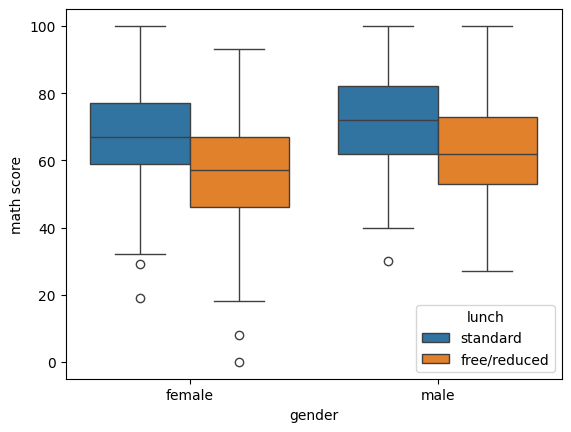

In [70]:
# 3 - Boxplot with hue
sns.boxplot(x='gender', y='math score', hue='lunch', data=dataset)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

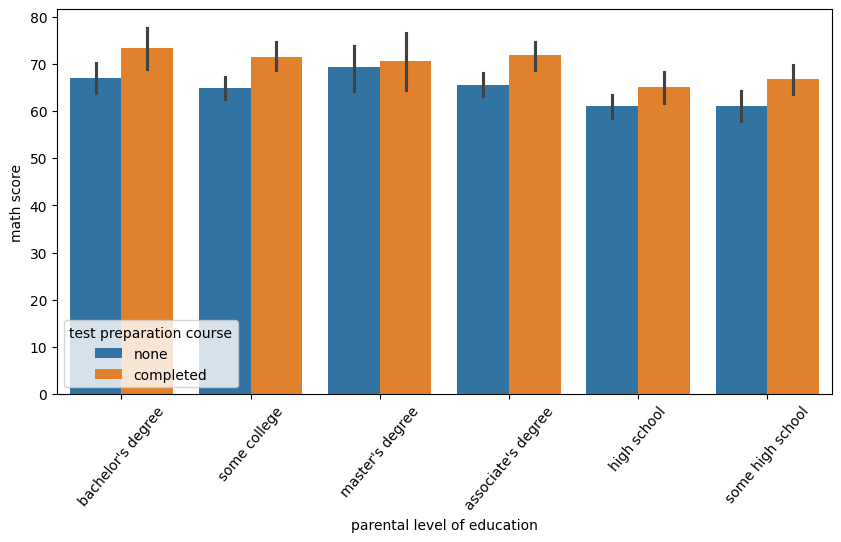

In [71]:
#4 - Barplot with hue
plt.figure(figsize=(10,5))
sns.barplot(x='parental level of education', y='math score', hue='test preparation course', data=dataset)
plt.xticks(rotation=50)

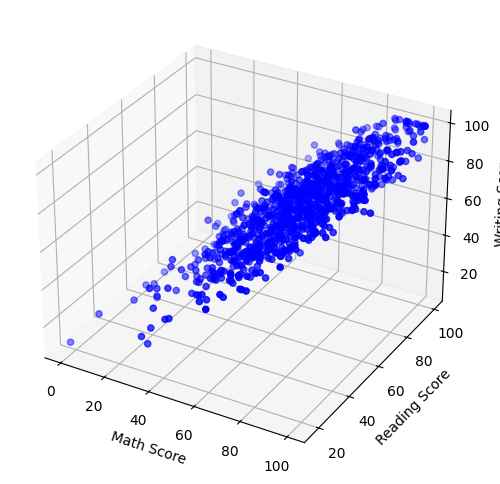

In [72]:
# Multivariate Plots
# Heatmap
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset['math score'], dataset['reading score'], dataset['writing score'], c='blue')
ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')
ax.set_zlabel('Writing Score')
plt.show()